In [59]:
import pandas as pd
import numpy as np
from Neural_Network import Neural_Network
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

# Parte 1. Iris.csv.

In [60]:
iris = pd.read_csv('datasets/iris.csv')

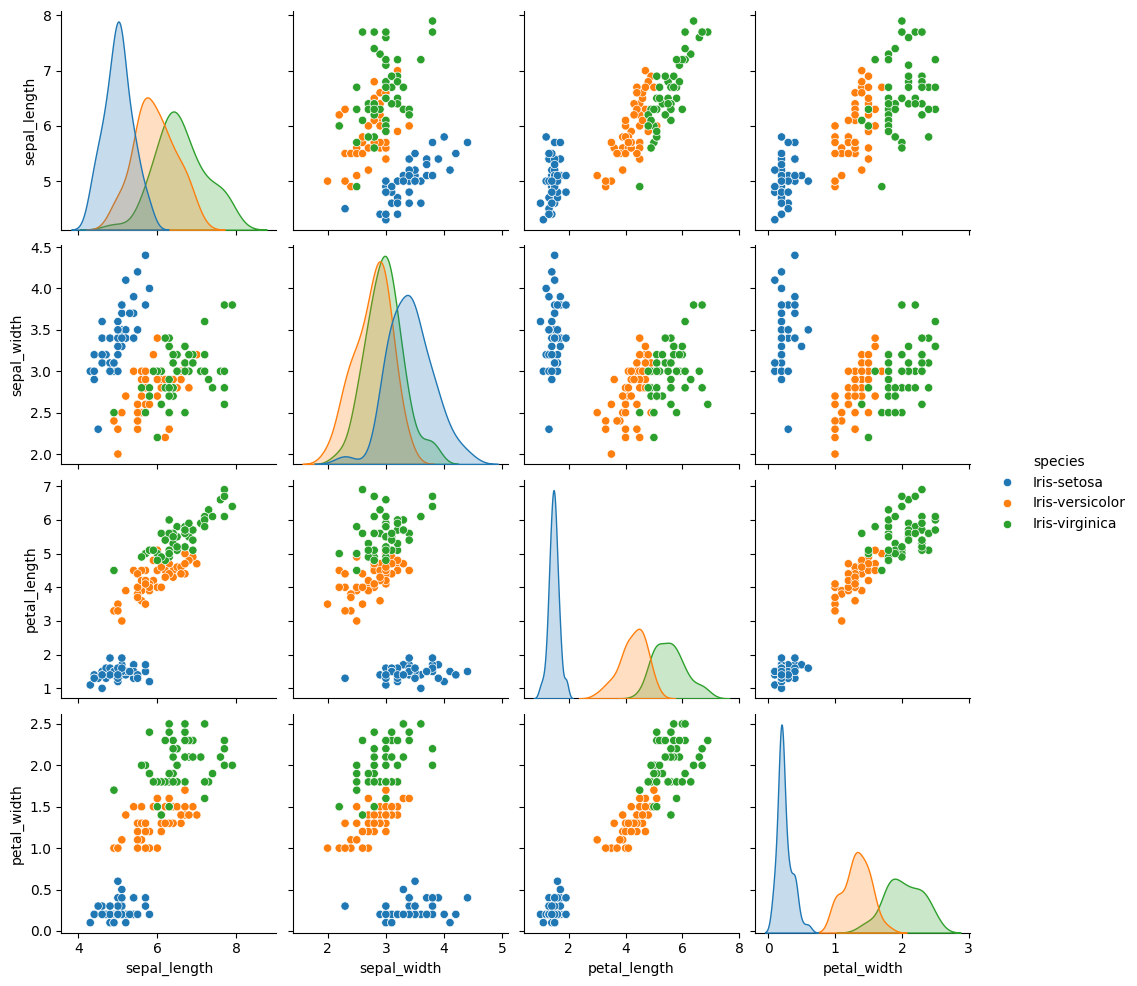

In [61]:
sns.pairplot(data=iris, hue='species')

In [62]:
def automate_testing(df: pd.DataFrame,
                     ind_vars: [str],
                     dep_vars: [str],
                     hidden_layer_lengths: [[int]],
                     max_iter : [int],
                     learning_rate: [int]) -> pd.DataFrame:
    
    result_df = pd.DataFrame()
    num_experimento = 1
    for hidden_layers in hidden_layer_lengths:
        for iter in max_iter:
            for rate in learning_rate:
                nw = Neural_Network(dataset=df,
                                    ind_vars=ind_vars,
                                    dep_vars=dep_vars,
                                    hidden_layer_lengths=hidden_layers,
                                    max_iter = iter,
                                    learning_rate=rate)
                
                print(f"Experimento {num_experimento}")
                [mean_error, min_error, max_error] = nw.get_model()
                data = {
                    'num_experimento':[num_experimento],
                    'num_neuronas_por_capa_oculta': [hidden_layers],
                    'tasa_de_aprendizaje': [rate],
                    'iteraciones': [iter],
                    'error_medio': [mean_error],
                    'error_minimo': [min_error],
                    'max_error': [max_error]
                }
                curr_df = pd.DataFrame(data=data)
                result_df = pd.concat([result_df, curr_df])
                num_experimento += 1

    return result_df

In [63]:
iris_setosa = iris.copy()
iris_setosa['species'] = iris_setosa['species'].apply(lambda s: 1 if s == 'Iris-setosa' else 0)

In [64]:
iris_versicolor = iris.copy()
iris_versicolor['species'] = iris_versicolor['species'].apply(lambda s: 1 if s == 'Iris-versicolor' else 0)

In [65]:
iris_virginica = iris.copy()
iris_virginica['species'] = iris_virginica['species'].apply(lambda s: 1 if s == 'Iris-virginica' else 0)

In [66]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
iris_species = iris.copy()
iris_species = pd.get_dummies(iris, columns=['species'])

## Clasificadores binarios

### Una sola neurona 

#### Iris setosa

Experimento 1


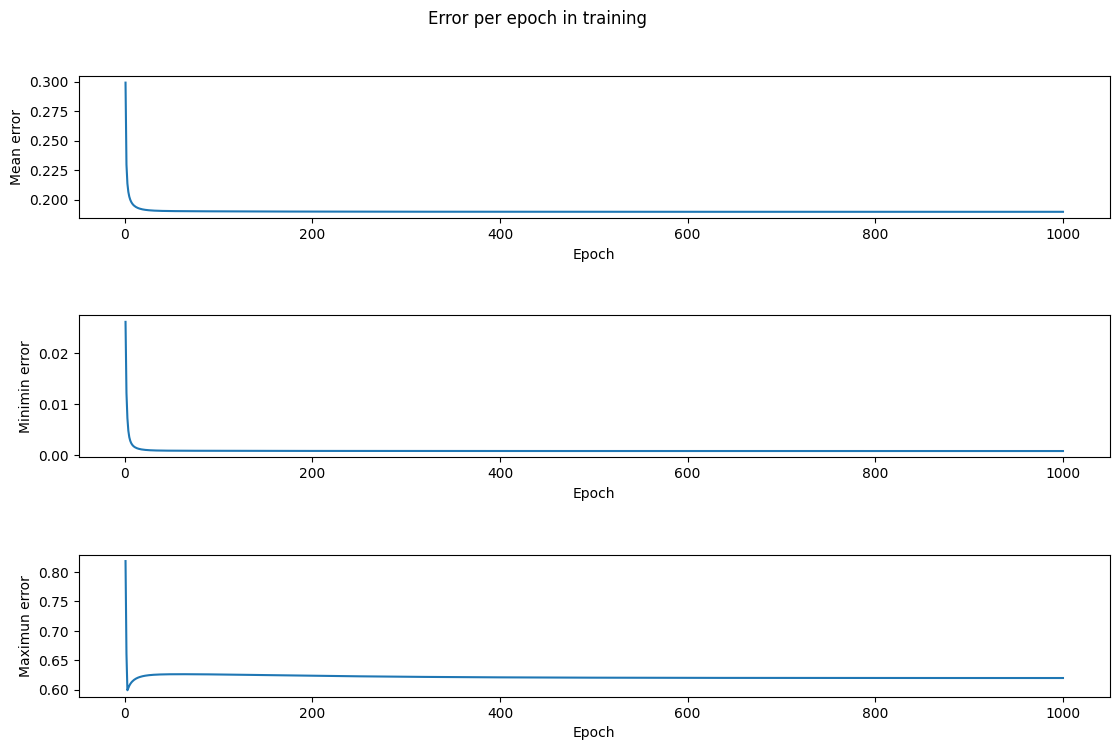

Mean of error: 0.13362947106476633
Minimun error: 0.002250792561761326
Maximun error: 0.6221858629979018
Number of tests: 30
Number of tests failed: 0
Experimento 2


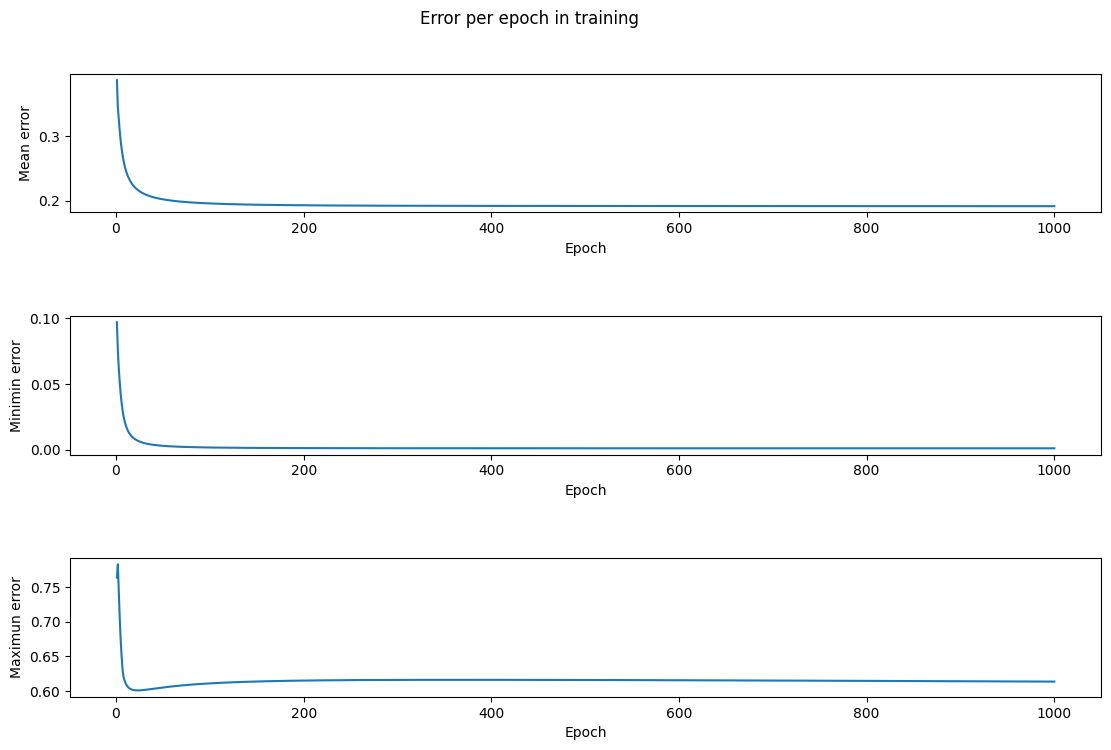

Mean of error: 0.13010106538219948
Minimun error: 0.0028684781238534954
Maximun error: 0.5826286619809309
Number of tests: 30
Number of tests failed: 0
Experimento 3


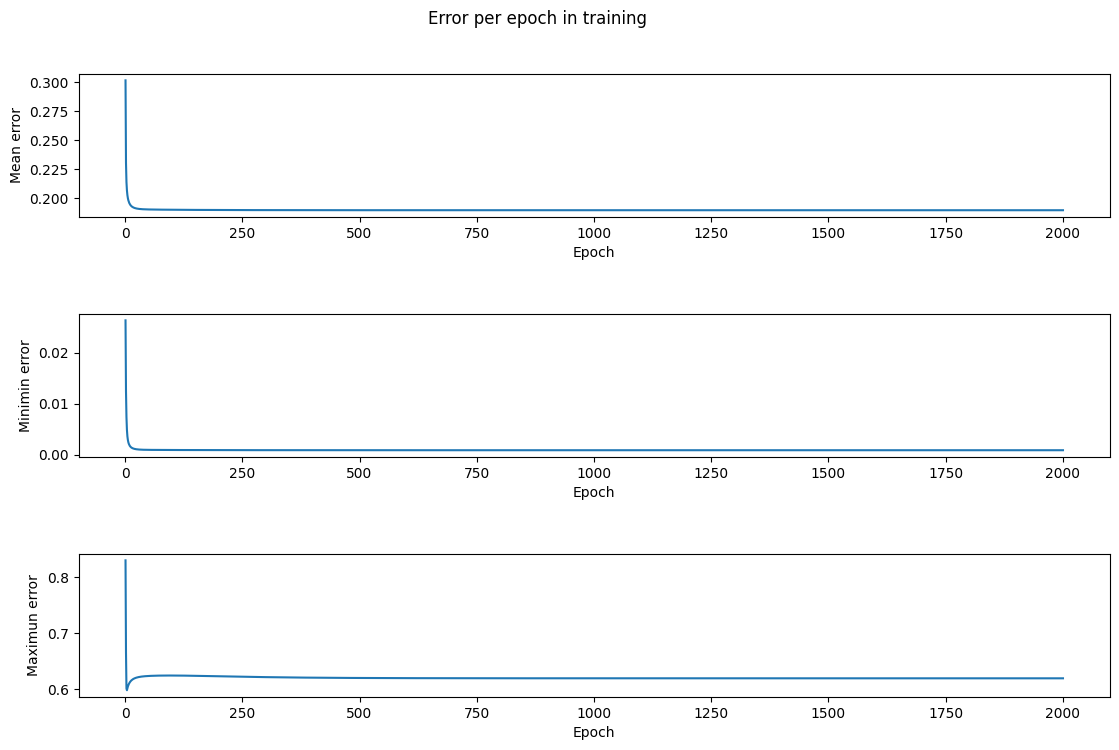

Mean of error: 0.1336317597413992
Minimun error: 0.0022509117444399363
Maximun error: 0.6222219093745183
Number of tests: 30
Number of tests failed: 0
Experimento 4


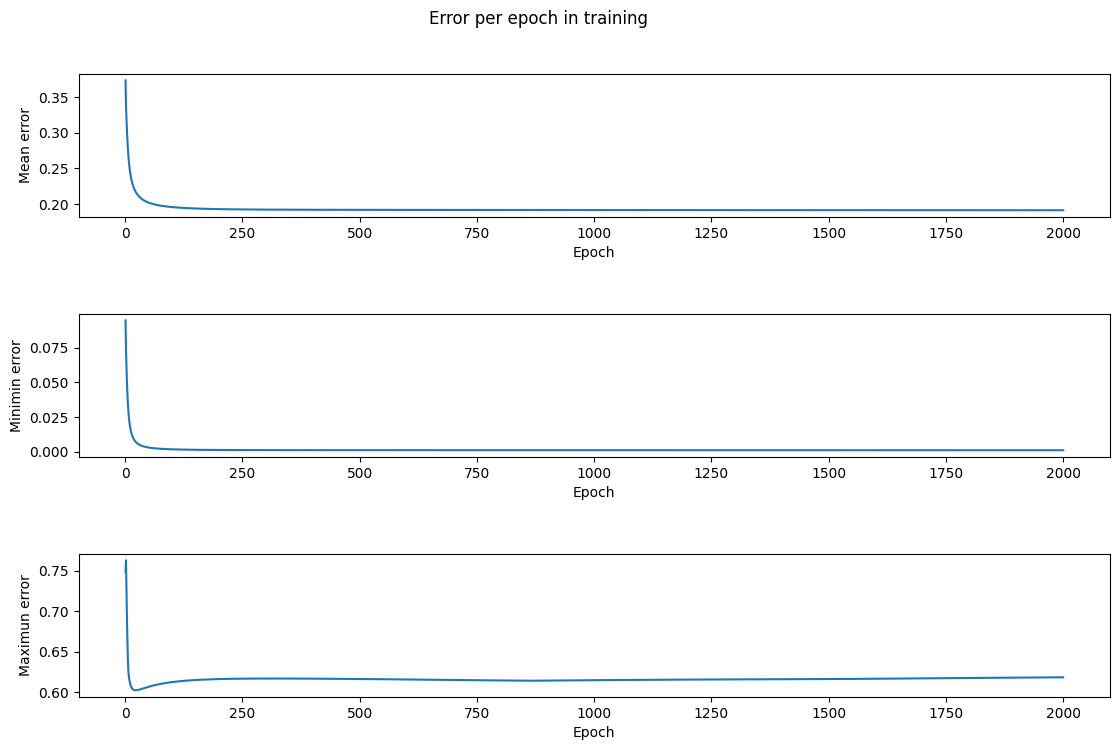

Mean of error: 0.12939054021667462
Minimun error: 0.0029074599706236963
Maximun error: 0.5800438446243563
Number of tests: 30
Number of tests failed: 0


In [67]:
iris_setosa_una_neurona = automate_testing(df = iris_setosa,
                                            ind_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                            dep_vars=['species'],
                                            hidden_layer_lengths=[[]],
                                            max_iter=[1000, 2000],
                                            learning_rate=[0.1, 0.01])
iris_setosa_una_neurona.to_csv('datasets/iris_setosa_una_neurona.csv', index=False)

#### Iris versicolor

Experimento 1


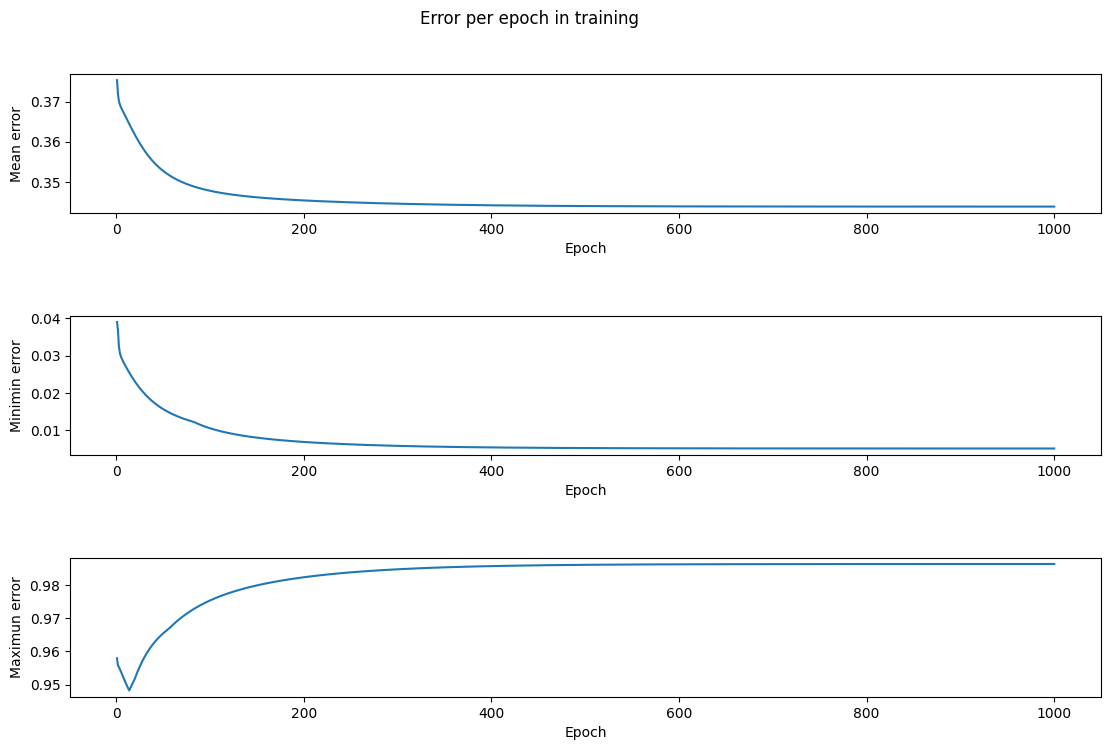

Mean of error: 0.3891555247621274
Minimun error: 0.09583454284952675
Maximun error: 0.826241183678275
Number of tests: 30
Number of tests failed: 0
Experimento 2


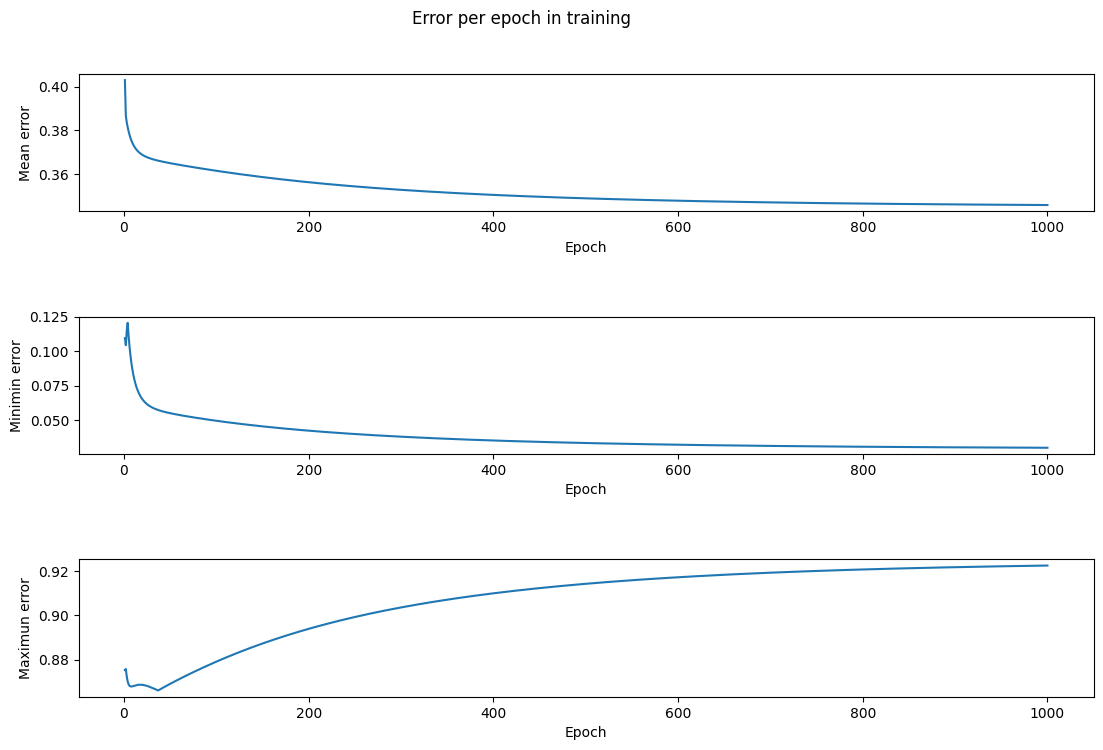

Mean of error: 0.38531742384082274
Minimun error: 0.06794104888776174
Maximun error: 0.8403117026017071
Number of tests: 30
Number of tests failed: 0
Experimento 3


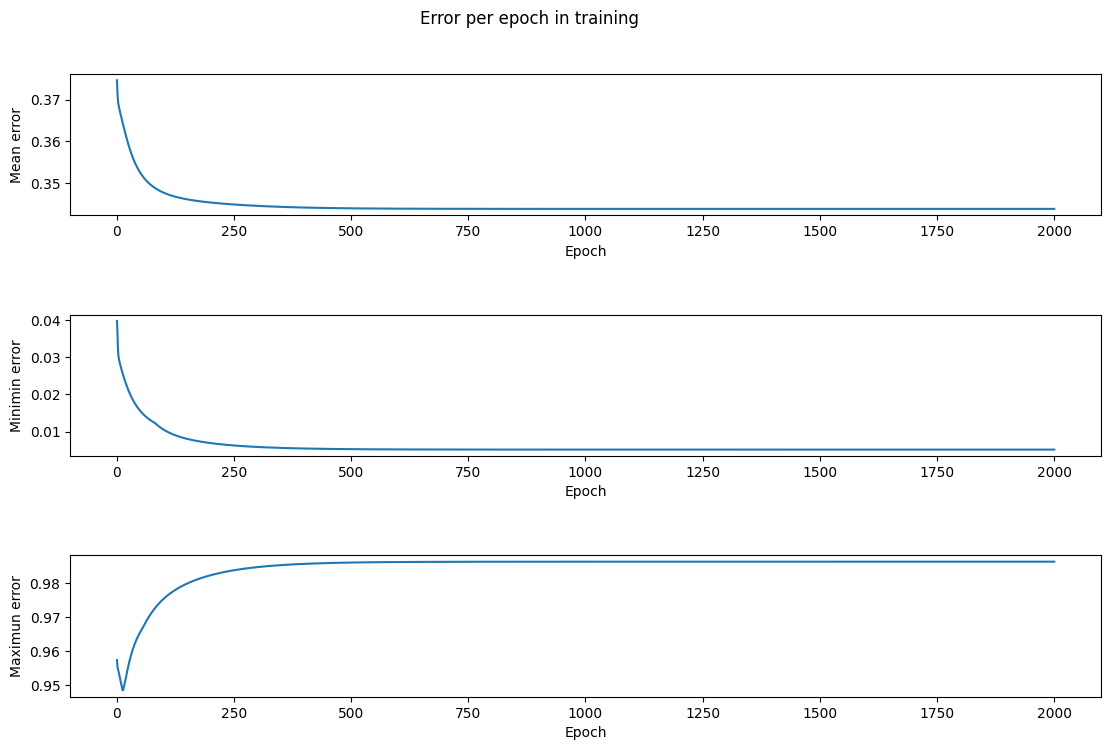

Mean of error: 0.38915160133387794
Minimun error: 0.09582608297151332
Maximun error: 0.8262642246660592
Number of tests: 30
Number of tests failed: 0
Experimento 4


In [68]:
iris_versicolor_una_neurona = automate_testing(df = iris_versicolor,
                                            ind_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                            dep_vars=['species'],
                                            hidden_layer_lengths=[[]],
                                            max_iter=[1000, 2000],
                                            learning_rate=[0.1, 0.01])
iris_versicolor_una_neurona.to_csv('datasets/iris_versicolor_una_neurona.csv', index=False)

#### Iris virginica

In [ ]:
iris_virginica_una_neurona = automate_testing(df = iris_virginica,
                                            ind_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                            dep_vars=['species'],
                                            hidden_layer_lengths=[[]],
                                            max_iter=[1000, 2000],
                                            learning_rate=[0.1, 0.01])
iris_virginica_una_neurona.to_csv('datasets/iris_virginica_una_neurona.csv', index=False)

### Una capa oculta

#### Iris setosa

In [ ]:
iris_setosa_una_capa = automate_testing(df = iris_setosa,
                                            ind_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                            dep_vars=['species'],
                                            hidden_layer_lengths=[[1], [2], [4], [8]],
                                            max_iter=[1000, 2000],
                                            learning_rate=[0.1, 0.01])
iris_setosa_una_capa.to_csv('datasets/iris_setosa_una_capa.csv', index=False)

#### Iris versicolor

In [ ]:
iris_versicolor_una_capa = automate_testing(df = iris_versicolor,
                                            ind_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                            dep_vars=['species'],
                                            hidden_layer_lengths=[[1], [2], [4], [8]],
                                            max_iter=[1000, 2000],
                                            learning_rate=[0.1, 0.01])
iris_versicolor_una_capa.to_csv('datasets/iris_versicolor_una_capa.csv', index=False)

#### Iris virgnica

In [ ]:
iris_virginica_una_capa = automate_testing(df = iris_virginica,
                                            ind_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                            dep_vars=['species'],
                                            hidden_layer_lengths=[[1], [2], [4], [8]],
                                            max_iter=[1000, 2000],
                                            learning_rate=[0.1, 0.01])
iris_virginica_una_capa.to_csv('datasets/iris_virginica_una_capa.csv', index=False)

### Dos capas ocultas

#### Iris setosa

In [ ]:
iris_setosa_dos_capas = automate_testing(df = iris_setosa,
                                            ind_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                            dep_vars=['species'],
                                            hidden_layer_lengths=[[1, 2], [2, 4], [4, 8], [8, 16],
                                                                [1, 1], [2, 2], [4, 4], [8, 8]],
                                            max_iter=[1000, 2000],
                                            learning_rate=[0.1, 0.01])
iris_setosa_dos_capas.to_csv('datasets/iris_setosa_dos_capas.csv', index=False)

#### Iris versicolor

In [ ]:
iris_versicolor_dos_capas = automate_testing(df = iris_versicolor,
                                            ind_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                            dep_vars=['species'],
                                            hidden_layer_lengths=[[1, 2], [2, 4], [4, 8], [8, 16],
                                                                [1, 1], [2, 2], [4, 4], [8, 8]],
                                            max_iter=[1000, 2000],
                                            learning_rate=[0.1, 0.01])
iris_versicolor_dos_capas.to_csv('datasets/iris_versicolor_dos_capas.csv', index=False)

#### Iris virginica

In [ ]:
iris_virginica_dos_capas = automate_testing(df = iris_virginica,
                                            ind_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                            dep_vars=['species'],
                                            hidden_layer_lengths=[[1, 2], [2, 4], [4, 8], [8, 16],
                                                                [1, 1], [2, 2], [4, 4], [8, 8]],
                                            max_iter=[1000, 2000],
                                            learning_rate=[0.1, 0.01])
iris_virginica_dos_capas.to_csv('datasets/iris_virginica_dos_capas.csv', index=False)

## Clasificadores multiclase

### Experimento 1 - Una capa oculta

In [ ]:
# experimento_1 = automate_testing(df=iris_species,
#                  ind_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
#                  dep_vars=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'],
#                  hidden_layer_lengths=[[1], [2], [4], [8]],
#                  max_iter=[1000, 2000],
#                  learning_rate=[0.1, 0.01])

In [ ]:
#experimento_1.to_csv('datasets/results_multiclase_una_capa.csv', index=False)

### Experimento 2 - Dos capas ocultas

In [ ]:
# experimento_2 = automate_testing(df=iris_species,
#                  ind_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
#                  dep_vars=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'],
#                  hidden_layer_lengths=[[1, 2], [2, 4], [4, 8], [8, 16],
#                                        [1, 1], [2, 2], [4, 4], [8, 8]],
#                  max_iter=[1000, 2000],
#                  learning_rate=[0.1, 0.01])

In [ ]:
#experimento_2.to_csv('datasets/results_multiclase_dos_capas.csv', index=False)

# Parte 2. spam

In [ ]:
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
           'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
           'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
           'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 
           'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
           'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
           'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
           'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
           'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
           'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',  
           'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',      
           'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',   
           'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 
           'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 
           'capital_run_length_total', 'is_spam']
spambase = pd.read_csv('datasets/spambase.data') ## hay que agregarle manualmente las columnas
spambase.columns=columns
spambase

In [ ]:
nw = Neural_Network(dataset=spambase,
                    dep_vars=['is_spam'],
                    ind_vars=columns[:-1],
                    hidden_layer_lengths=[4],
                    max_iter=100,
                    learning_rate=0.1)
nw.get_model()